### Regularization and Feature Selection

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><mi>J</mi><mo stretchy="false">(</mo><msub><mi>β</mi><mn>0</mn></msub><mo separator="true">,</mo><msub><mi>β</mi><mn>1</mn></msub><mo stretchy="false">)</mo><mo>=</mo><mfrac><mn>1</mn><mi>m</mi></mfrac><munderover><mo>∑</mo><mrow><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><msup><mrow><mo fence="true">(</mo><msub><mi>β</mi><mn>0</mn></msub><mo>+</mo><msub><mi>β</mi><mn>1</mn></msub><msub><mi>x</mi><mtext>obs</mtext></msub><mo stretchy="false">(</mo><mi>i</mi><mo stretchy="false">)</mo><mo>−</mo><msub><mi>y</mi><mtext>obs</mtext></msub><mo stretchy="false">(</mo><mi>i</mi><mo stretchy="false">)</mo><mo fence="true">)</mo></mrow><mn>2</mn></msup></mrow><annotation encoding="application/x-tex">J(\beta_0, \beta_1) = \frac{1}{m} \sum_{i=1}^{m} \left( \beta_0 + \beta_1 x_{\text{obs}}(i) - y_{\text{obs}}(i) \right)^2 
</annotation></semantics></math>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearnex import patch_sklearn

In [13]:
# Apply Intel Extension for Scikit-learn
patch_sklearn()

# Step 1: Create an Expanded Dataset
data = {
    'Budget': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200],
    'Box_Office': [60, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250]
}

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [14]:
# Adding some variations and outliers
data['Box_Office'][2] = 180  # Lower than expected
data['Box_Office'][5] = 320  # Lower than expected
data['Box_Office'][8] = 480  # Lower than expected
data['Box_Office'][11] = 700  # Higher than expected
data['Box_Office'][14] = 820  # Higher than expected
data['Box_Office'][17] = 980  # Higher than expected

In [15]:
df = pd.DataFrame(data)

In [16]:
# Features and target variable
X = df[['Budget']]
y = df['Box_Office']

# Step 2: Feature Selection
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [17]:
# Step 4: Perform Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [18]:
# Step 5: Perform Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


In [19]:
# Step 6: Perform Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [21]:
# Step 7: Calculate Mean Squared Error
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Linear Regression MSE: {mse_linear:.2f}")
print(f"Ridge Regression MSE: {mse_ridge:.2f}")
print(f"Lasso Regression MSE: {mse_lasso:.2f}")

Linear Regression MSE: 492.12
Ridge Regression MSE: 492.12
Lasso Regression MSE: 492.14


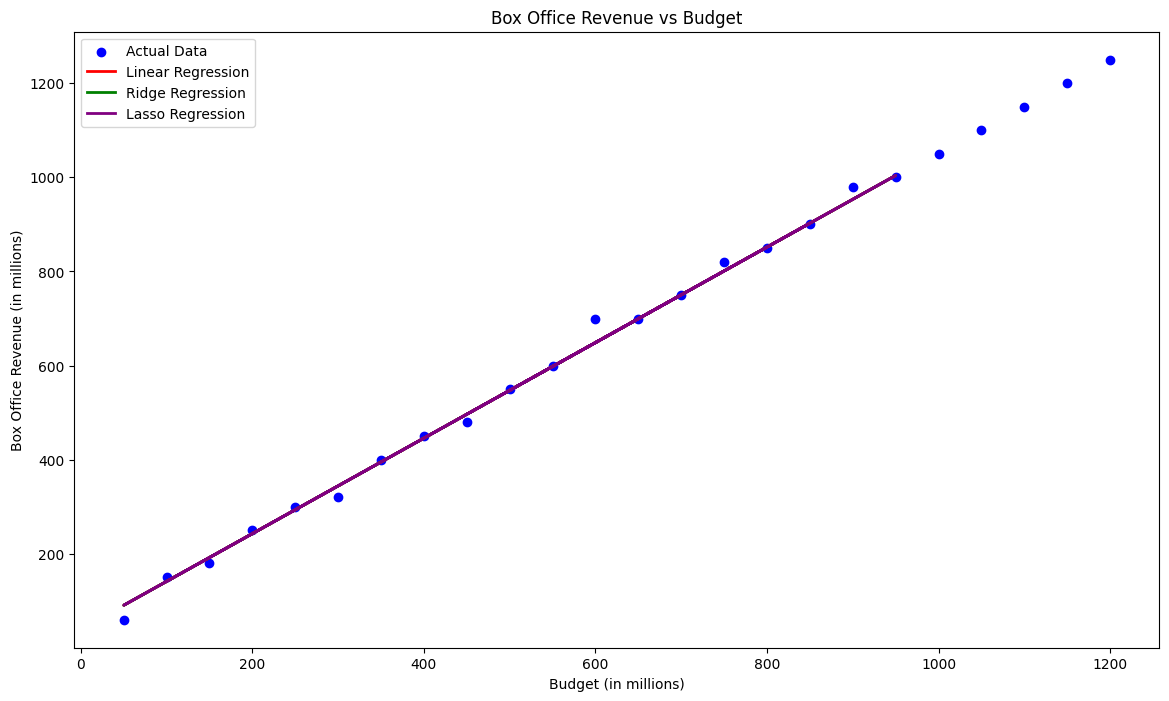

In [22]:
# Step 8: Plot the Results
plt.figure(figsize=(14, 8))
plt.scatter(X, y, color='blue', label='Actual Data')

# Linear Regression Line
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Linear Regression')

# Ridge Regression Line
plt.plot(X_test, y_pred_ridge, color='green', linewidth=2, label='Ridge Regression')

# Lasso Regression Line
plt.plot(X_test, y_pred_lasso, color='purple', linewidth=2, label='Lasso Regression')

plt.title('Box Office Revenue vs Budget')
plt.xlabel('Budget (in millions)')
plt.ylabel('Box Office Revenue (in millions)')
plt.legend()
plt.show()